# Proyecto de programación en Python

## A) Generar fichero de llamadas World-Com

Se solicita generar el archivo de texto de prueba "llamadas2020.txt" a partir de datos aleatorios que describan las hipotéticas llamadas que podrían tener lugar a lo largo del primer trimestre de 2020. 

Este archivo contendrá 5000 líneas, cada una de las cuales contiene los siguientes datos: fecha de la llamada en formato yyyy-MM-dd, hora de la llamada en formato 24h, duración de la llamada en mm:ss, código del cliente emisor de la llamada identificando su país de origen, código del cliente receptor de la llamada identificando su país de origen y serie de palabras clave obtenidas de la conversación. Estos datos están separados por " # ", como en las siguientes líneas de ejemplo:

    2020-01-03 # 0:21 # 4:46 # A-023 # C-238 # oferta mejor tarifa teléfono no me interesa
    2020-02-17 # 5:01 # 1:12 # B-089 # A-210 # pedido listo entregar domicilio cuando mañana tarde
    2020-02-23 # 15:21 # 9:58 # A-454 # A-MbnT5e # amorcito mañana vernos cenar cine te quiero muchito
    2020-03-02 # 45:19 # 1:01 # D-9UygD5 # E-HFb28S # atraco lingotes oro banco del sur discretos ok mañana
    2020-03-23 # 17:05 # 5:30 # C-10IOjJ # E-MbG5Ed # mami lentejas exquisitas receta estupenda gracias

A continuación se describirán las funciones destinadas a obtener cada uno de estos datos de prueba:

### 1. Fecha aleatoria de llamada

Se define la función "random_date(inicio, final)" para generar una fecha aleatoria elegida uniformemente en un periodo de tiempo definido por el usuario con el formato yyyy-MM-dd. Para ello haremos uso de los módulos "random" y "datetime".

In [1]:
def random_date(inicio, final):
    """
    Función que genera una fecha aleatoria en el periodo comprendido entre "inicio" y "final"
        
    Parameters
    ----------
    inicio, final : tuplas de int en que se indican (yyyy,MM,dd)
    
    Returns
    -------
    str
        Cadena de texto representando una fecha aleatoria perteneciente al periodo indicado con el formato 'yyyy-MM-dd'
    
    Preconditions
    ------------
    1 <= yyyy <=9999
    1 <= MM   <=12
    1 <= dd   <=número de días en MM
    inicio < final
    
    Example
    -------
    >>> random_date((2020,1,1), (2020,3,31))
    '2020-02-15'
    """
    import random
    from datetime import date
    
    inicio = date(inicio[0], inicio[1], inicio[2])
    final =  date(final[0], final[1], final[2])
    #se suma a la fecha inicial un periodo aleatorio comprendido entre la fecha inicial y la fecha final
    random_date = inicio + (final - inicio) * random.random() 
    
    return random_date.isoformat()

random_date((2020,1,1),(2020,3,31))

'2020-03-23'

### 2. Hora aleatoria de llamada

Se define la función "random_time()" para generar un momento del día aleatorio elegido uniformemente con el formato hh:mm (24h). Para ello haremos uso de los módulos "random" y "datetime".

In [2]:
def random_time():
    """
    Función que genera un momento aleatorio del día expresado en hh:mm con formato 24h
        
    Parameters
    ----------
    None
    
    Returns
    -------
    str
        Cadena de texto de la forma 'hh:mm'
    
    Preconditions
    ------------
    None
    
    Example
    -------
    >>> random_time()
    '10:24'
    """
    import random
    from datetime import timedelta 
    
    dia_completo =  timedelta(hours = 23, minutes = 59)
    random_time = str(dia_completo * random.random())
    
    return random_time[0:random_time.index(":",3)] #solo nos interesa la porción de resultado que indica horas y minutos

random_time()

'18:19'

### 3. Duración aleatoria de llamada

Se define la función "random_time_length_poisson(mu)" para generar un periodo de tiempo aleatorio elegido según la distribución de Poisson de #mu segundos en promedio con el formato mm:ss. Para ello haremos uso de los módulos "SciPy.Stats.Poisson" y "datetime".

In [3]:
def random_time_length_poisson(mu):
    """
    Función que genera un periodo de tiempo aleatorio según la distribución de Poisson con "mu" de promedio
        
    Parameters
    ----------
    mu : segundos de duración del periodo de tiempo promedio de la distribución
    
    Returns
    -------
    str
        Cadena de texto representando un periodo aleatorio con el formato mm:ss
    
    Preconditions
    ------------
    mu > 0
    
    Example
    -------
    >>> random_time_length_poisson(300)
    '4:47'
    """
    from scipy.stats import poisson
    from datetime import timedelta
    
    duracion_HHMMSS = str(timedelta(minutes = poisson.rvs(mu)//60, seconds=poisson.rvs(mu)%60))
    
    #si las horas del resultado son 0, se descartan, al igual que el 0 inicial de los minutos si son inferiores a 10
    if duracion_HHMMSS.startswith('0'):
        if duracion_HHMMSS[(duracion_HHMMSS.index(":")+1):].startswith('0'):
            duracion_MMSS = duracion_HHMMSS[(duracion_HHMMSS.index(":")+2):] 
        else:
            duracion_MMSS = duracion_HHMMSS[(duracion_HHMMSS.index(":")+1):]
    #si las horas del resultado no son 0, se pasan a minutos
    else:
        duracion_MMSS = str(int(duracion_HHMMS[:(duracion_HHMMSS.index(":"))])*60 
        + int(duracion_HHMMSS[(duracion_HHMMSS.index(":")+1):(duracion_HHMMSS.index(":")+3)])) 
        + duracion_HHMMSS[(duracion_HHMMSS.index(":")+3):]
        
    return duracion_MMSS

random_time_length_poisson(300)

'5:15'

### 4. Códigos de clientes

Se define la función "customer_codes(archivo)" para generar un array de códigos de cliente únicos para todos los clientes de la compañía. Cada código consiste en una letra mayúscula que codifica el país de origen del cliente, un guión y un número de tres cifras aleatorio elegido uniformemente del 000 al 999, por ejemplo 'B-704'. 

En el archivo externo con el nombre indicado en los parámetros estarán registradas las letras correspondientes al código de cada país en una fila separadas por espacios y el número de clientes de cada país en otra fila siguiendo el mismo orden y separados también por espacio, con lo que en cada columna encontraríamos el código del país y su número de clientes, siendo ampliable la información contenida en este fichero siguiendo la misma estructura. 

El array generado por la función contendrá, por lo tanto, tantos clientes de cada país como se indica en el archivo externo. Para obtenerlo haremos uso de los módulos "numpy" y "random".

In [4]:
def customer_codes(archivo):
    """
    Función que genera un array con los códigos de los clientes de todos los países presentes en la primera fila del archivo 
    indicado como parámetro. El array contendrá tantos códigos únicos por cada país como número de clientes por país que se 
    indica en la segunda fila del archivo. 
    
    Los códigos están formados por:
         - una letra de las presentes en la primera fila del archivo indicado como parámetro
         - un guión
         - un número de tres cifras escogido aleatoriamente entre el 000 y el 999
        
    Parameters
    ----------
    archivo : cadena de texto indicando el nombre del archivo del que se extraen las letras representantes de cada país y sus 
    pesos (número de clientes de cada país)
    
    Returns
    -------
    array
        conjunto de códigos de cliente únicos para todos los clientes de la compañía
    
    Preconditions
    ------------
    el archivo debe existir en la carpeta que alberga el script con el nombre indicado, debiendo incluirse la extensión.
    
    Example
    -------
    >>> customer_codes("ClientesPorPaises.txt")
    array(['A-979', 'A-671', 'A-272', ..., 'E-098', 'E-828', 'E-285'],
      dtype='<U32')
    """
    import numpy as np
    import random
    
    clientes_paises = []
    with open(archivo, 'r') as f:
        for fila in f:
            x = fila.split()
            clientes_paises.append(x)
    paises = clientes_paises[0]
    clientes = clientes_paises[1]
    todos_los_clientes = np.array([])
    for pais in paises:
        numero_clientes = int(clientes[paises.index(pais)])
        #para obtener los códigos de tres cifras se generará una lista con tantos elementos como clientes tenga cada país  
        #extraídos de la permutación aleatoria de los números entre el 0 y el 999, garantizando que cada elemento sea único. 
        codigos_numericos = random.sample(range(0,999), numero_clientes)
        #Después se les añade la letra del país correspondiente, un guión y tantos ceros a la izquierda como sea necesario para
        #completar las tres cifras.
        clientes_pais = np.array([pais + "-" + str(num_cod).rjust(3, '0') for num_cod in codigos_numericos])
        todos_los_clientes= np.append(todos_los_clientes, clientes_pais)
    return todos_los_clientes

customer_codes("ClientesPorPaises.txt")

array(['A-835', 'A-958', 'A-968', ..., 'E-708', 'E-638', 'E-628'],
      dtype='<U32')

### 5. Palabras clave aleatorias 

Se define la función "random_key_words()" para generar aleatoriamente una lista de palabras que puedan emular a las palabras clave de una conversación. 

El número de palabras se elegirá aleatoriamente con una distribución uniforme entre 5 y 25. 

Las palabras se extraerán de un corpus generado mediante el procedimiento "generar_corpus()" a partir de las 500 palabras más frecuentes del español y sus frecuencias relativas, recogidas en la url "https://es.wiktionary.org/wiki/Wikcionario:Frecuentes-(1-1000)-Subt%C3%ADtulos_de_pel%C3%ADculas ", de las que se descartan todas aquellas palabras que no aportan significado, como por ejemplo, preposiciones. De este corpus se elegirán aleatoriamente mediante la función "random_key_words()" el número de palabras aleatorio explicado en el párrafo anterior atendiendo a la frecuencia relativa de cada uno, siendo más probable elegir una palabra cuanta más frecuencia de uso presente. Para ello haremos uso de los módulos "BeautifulSoup", "requests", "nltk.corpus.stopwords", "numpy" y "random".

In [5]:
def generar_corpus():
    """
    Procedimiento que genera el fichero 'corpus_500_palabras_mas_frecuentes.txt'. Este fichero contiene dos columnas, la primera
    está compuesta por las palabras más frecuentes del español y la segunda por las frecuencias en ppm (palabras por millón)
    de cada una de ellas. Las columnas estarán ordenadas de mayor a menor frecuencia. Los datos se extraen a partir del
    código fuente de la página con url
    https://es.wiktionary.org/wiki/Wikcionario:Frecuentes-(1-1000)-Subt%C3%ADtulos_de_pel%C3%ADculas
    
    Parameters
    ----------
    None
    
    Returns
    -------
    None
    
    Preconditions
    ------------
    es necesario que exista conexión a internet y que la página web
    https://es.wiktionary.org/wiki/Wikcionario:Frecuentes-(1-1000)-Subt%C3%ADtulos_de_pel%C3%ADculas esté disponible.
    Además el módulo nltk debe estar descargado en el equipo, si no será necesario descargarlo descomentando la línea de
    código 'nltk.download()', presente en las líneas iniciales de la definición del procedimiento.
    """
    from bs4 import BeautifulSoup
    import requests
    import nltk
    #nltk.download()
    from nltk.corpus import stopwords
    
    palabras_frecuentes = []
    
    #Extraemos los datos de palabras y frecuencias del código html de una web a partir de su url
    
    url_palabras_frecuentes = "https://es.wiktionary.org/wiki/Wikcionario:Frecuentes-(1-1000)-Subt%C3%ADtulos_de_pel%C3%ADculas"
    codigo_html_palabras_frecuentes = requests.get(url_palabras_frecuentes).text
    codigo_html_BS = BeautifulSoup(codigo_html_palabras_frecuentes, "lxml")
    
    #Los valores que nos interesan están incluidos en una tabla (etiqueta 'table'), en cada una de sus celdas (etiquetas 'td')
    
    tabla_palabras_frecuencias = codigo_html_BS.find('table')
    html_palabras_frecuencias = tabla_palabras_frecuencias.find_all('td')
    
    #Para cada etiqueta 'td' encontrada en la tabla (celda), añadimos un elemento a la lista "palabras_frecuentes"
    
    for celda in html_palabras_frecuencias:
        palabras_frecuentes.append(celda.get_text())
        
    #Ahora tenemos una lista en la que aparecen, por cada palabra, su número de orden según frecuencia, la palabra y su
    #frecuencia. Cada uno de estos elementos incorpora un salto de línea que queremos eliminar.
    
    palabras_frecuentes_strip = []
    for elemento in palabras_frecuentes:
        palabras_frecuentes_strip.append(elemento.strip())
    
    #A continuación, queremos conseguir una lista que contenga exclusivamente las palabras y las frecuencias, descartando el 
    #elemento que contiene el orden de la palabra según su frecuencia.
    
    palabras_frecuentes_sin_ordinal = []
    for elemento in palabras_frecuentes_strip:
        indice = palabras_frecuentes_strip.index(elemento)
        if indice not in range(0,len(palabras_frecuentes_strip),3):
            palabras_frecuentes_sin_ordinal.append(elemento)
    
    #Ahora que ya tenemos una nueva lista que solo contiene las palabras y las frecuencias, vaciamos la lista inicial 
    #"palabras_frecuentes" para añadirle como elementos sublistas que contienen cada una una palabra y su frecuencia, de manera
    #que ambos valores quedan asociados
    
    palabras_frecuentes = []
    for indice in range(0,len(palabras_frecuentes_sin_ordinal),2):
        palabra_frecuencia = []
        palabra_frecuencia.append(palabras_frecuentes_sin_ordinal[indice])
        palabra_frecuencia.append(palabras_frecuentes_sin_ordinal[indice+1])
        palabras_frecuentes.append(palabra_frecuencia)
    
    #Definimos la función "eliminar_stopwords", capaz de eliminar de una lista de listas como "palabras_frecuentes" aquellos
    #elementos (par palabra-frecuencia) en los que la palabra sea una stopword

    def palabras_sin_stopwords(listado_palabras):
        for elemento in listado_palabras:
            if elemento[0] in stopwords.words("spanish"):
                listado_palabras.remove(elemento)
        return listado_palabras
    
    #Aplicamos la función a la lista "palabras_frecuentes"
    
    palabras_frecuentes_sin_stopwords = palabras_sin_stopwords(palabras_frecuentes)
    
    #Ordenamos descendentemente la lista según frecuencia
    
    palabras_frecuentes_sin_stopwords.sort(key = lambda palabras_frecuencias: int(palabras_frecuencias[1]), reverse = True)
    
    #Creamos sendas listas por separado de palabras y frecuencias
    
    palabras = []
    frecuencias = []
    [palabras.append(elemento[0]) for elemento in palabras_frecuentes_sin_stopwords]
    [frecuencias.append(elemento[1]) for elemento in palabras_frecuentes_sin_stopwords]
    
    #Generamos un fichero txt con las 500 primeras palabras
    
    with open('corpus_500_palabras_mas_frecuentes.txt','w') as f:
        for i in range(500):
            f.write(palabras[i].ljust(20)+" "+frecuencias[i].ljust(20)+"\n")
            
generar_corpus()

In [6]:
def random_key_words():
    """
    Función que genera un listado aleatorio de palabras a partir del fichero 'corpus_500_palabras_mas_frecuentes.txt', en el que
    aparecen en dos columnas las 500 palabras más frecuentes del español y sus frecuencias relativas en ppm. El listado generado
    cumple las siguientes condiciones:
        -el número de palabras es un número aleatorio elegido uniformemente entre 5 y 25
        -las palabras se eligen aleatoriamente atendiendo a una probabilidad proporcional a su frecuencia
        
    Parameters
    ----------
    None
    
    Returns
    -------
    list
        listado de palabras
    
    Preconditions
    ------------
    el archivo 'corpus_500_palabras_mas_frecuentes.txt' debe existir en la carpeta que alberga el script.
    
    Example
    -------
    >>> random_key_words()
    ['dos',
     'diablos',
     'primera',
     'cierto',
     'va',
     'necesito',
     'casa',
     'has',
     'mierda',
     'tengo',
     'bueno',
     'estas',
     'conoces',
     'se']
    """    
    import numpy as np
    import random
    
    #Generamos aleatoriamente con distribución uniforme entr 5 y 25 el número de palabras que va a contener la línea
    
    numero_palabras = random.randrange(5,25)
    
    #Leemos el fichero 'corpus_500_palabras_mas_frecuentes.txt' y obtenemos las listas 'palabras' y 'frecuencias' para usarlas
    #en np.random.choice
    
    palabras = []
    frecuencias = []
    with open('corpus_500_palabras_mas_frecuentes.txt','r') as f:
        [palabras.append(linea.split()[0])for linea in f]
    with open('corpus_500_palabras_mas_frecuentes.txt','r') as f:
        [frecuencias.append(linea.split()[1]) for linea in f]
        
    #Obtenemos un listado con el número aleatorio de palabras 'numero_palabras' en el que las palabras obtenidas del corpus
    #tienen una probabilidad de aparecer proporcional a su freecuencia.

    palabras_clave = np.random.choice(palabras,numero_palabras,frecuencias)
    return list(palabras_clave)
            
random_key_words()    

['seguir',
 'hiciste',
 'adónde',
 'acaba',
 'mierda',
 'mal',
 'equipo',
 'voy',
 'dónde',
 'vas',
 'primera',
 'poder',
 'auto',
 'vi',
 'mano',
 'juego',
 'vas']

### 6. Creación del fichero "llamadas2020.txt"

Se define el procedimiento "generar_fichero_llamadas(nombre_archivo_llamadas, lineas, nombre_archivo_clientes, inicio_periodo, final_periodo, segundos_promedio_llamadas)" para generar el fichero de llamadas solicitado. 

Este procedimiento llama a todas las funciones y procedimientos definidas anteriormente para obtener los datos requeridos.

In [7]:
def generar_fichero_llamadas(nombre_archivo_llamadas, lineas, nombre_archivo_clientes, inicio_periodo, final_periodo, 
                             segundos_promedio_llamadas):
    """
    Procedimiento que genera un fichero txt con el nombre y número de líneas que se desee conteniendo los siguientes datos: 
    fecha en formato yyyy-MM-dd, hora en formato 24h, duración en mm:ss, código del cliente emisor de la llamada y código del 
    cliente receptor de la llamada, distintos entre sí (un cliente no puede llamarse a sí mismo) y elegidos aleatoriamente 
    atendiendo a una distribución uniforme desde el array de clientes generado por la función 
    "customer_codes(nombre_archivo_clientes)"y serie de palabras clave obtenidas de la conversación. 
    
    Estos datos están separados por " # ". 
    
    Como el array de clientes generado por la función "customer_codes(nombre_archivo_clientes)" tiene tantos códigos de clientes
    de cada país como clientes tiene el país, en realidad la probabilidad de obtener un código de un país concreto es 
    proporcional al número de clientes de dicho país. 
    
    Por otra parte, como el número de llamadas producidas es superior al número total de clientes existentes, cada código puede
    aparecer como emisor o receptor en varias llamadas.
        
    Parameters
    ----------
    nombre_archivo_llamadas: nombre que se le quiere dar al fichero generado por el procedimiento
    lineas: número de líneas que se desea que contenga el fichero
    nombre_archivo_clientes: nombre del fichero que contiene la información de los clientes por país
    inicio_periodo: (yyyy,MM,dd) inicio del periodo del que se desea obtener las fechas
    final_periodo: (yyyy,MM,dd) fin del periodo del que se desea obtener las fechas
    segundos_promedio_llamadas : segundos de duración promedio de las llamadas
        
    Returns
    -------
    None
    
    Preconditions
    ------------
    Las funciones y procedimientos invocados deben estar definidos y haber sido ejecutados con éxito.
    """    
    import numpy as np
    with open (nombre_archivo_llamadas, 'w') as f:
        codigos_clientes = customer_codes(nombre_archivo_clientes)
        generar_corpus()
        for i in range(lineas):
            codigo_emisor = " ".join(np.random.choice(codigos_clientes, 1))
            codigo_receptor = " ".join(np.random.choice(codigos_clientes, 1))
            while codigo_emisor == codigo_receptor:
                codigo_receptor = " ".join(np.random.choice(codigos_clientes, 1))
            f.write(random_date(inicio_periodo,final_periodo) + " # "+random_time() + " # " + 
                    random_time_length_poisson(segundos_promedio_llamadas) + " # " + codigo_emisor + " # " + codigo_receptor +
                    " # " + " ".join(random_key_words()) + "\n")

generar_fichero_llamadas("llamadas2020.txt", 5000, "ClientesPorPaises.txt", (2020,1,1), (2020,3,31), 300)

## B) Contabilidad y análisis de llamadas

A continuación, se pide analizar el archivo de llamadas descrito, para sacar conclusiones desde el punto de vista social y desde el económico.

### 1. Obtención matriz renta per cápita por país desde archivo externo

Se define la función "rentas_per_capita(nombre_archivo)" para obtener las rentas per cápita de los países clientes de la compañía a partir de un fichero externo en el que se indica en la primera fila los países separados por espacios y en la segunda, los valores de renta per cápita en dólares con dos decimales.

Se decide devolver una lista de listas en la que el primer elemento es la lista de países (strings) y el segundo los valores de las rentas per cápita (float), por operatividad en su uso posterior para el análisis y la representación gráfica, ya que los arrays no permiten elementos con tipos diferentes.

In [8]:
def rentas_per_capita(nombre_archivo):
    """
    Función que genera una lista de listas en la que el primer elemento es la lista de países (strings) y el segundo los valores
    de las rentas per cápita (float) que se encuentran en el archivo indicado en los parámetros de la función.
        
    Parameters
    ----------
    nombre_archivo : cadena de texto indicando el nombre del archivo del que se extraen las letras representantes de cada país 
    y el valor de renta per cápita correspondiente a cada país.
    
    Returns
    -------
    list
        lista cuyo primer elemento es la lista de países y cuyo segundo elemento es la lista de rentas per cápita.
    
    Preconditions
    ------------
    el archivo debe existir en la carpeta que alberga el script con el nombre indicado, debiendo incluirse la extensión.
    
    Example
    -------
    >>> rentas_per_capita("renta_per_capita.txt")
    [['A', 'B', 'C', 'D', 'E'], [44469.91, 43323.81, 8826.99, 56307.51, 28156.82]]
    """
    renta_per_capita_paises = []
    
    with open (nombre_archivo, 'r') as f:
        for fila in f:
            x = fila.split()
            renta_per_capita_paises.append(x)
    #sustituimos cada uno de los elementos del listado de rentas per cápita (segunda lista) por su conversión a float para  
    #luego poder operar con ellos.         
    for element in renta_per_capita_paises[1]:
        renta_per_capita_paises[1].insert(renta_per_capita_paises[1].index(element), float(element))
        renta_per_capita_paises[1].remove(element)

    return renta_per_capita_paises

rentas_per_capita("renta_per_capita.txt")

[['A', 'B', 'C', 'D', 'E'], [44469.91, 43323.81, 8826.99, 56307.51, 28156.82]]

### 2. Obtención matriz tarifa por país desde archivo externo

Se define la función "tarifas_por_pais(nombre_archivo)" para obtener la matriz 5x5 de tarifas entre cada 2 países (emisor y receptor) en €/minuto de llamada a partir del fichero externo indicado en los parámetros de la función. Para ello haremos uso del módulo "numpy".

In [9]:
def tarifas_por_pais(nombre_archivo):
    """
    Función para obtener la matriz 5x5 de tarifas entre cada 2 países (emisor y receptor) en €/minuto de llamada a partir del
    fichero externo indicado en los parámetros de la función.
        
    Parameters
    ----------
    nombre_archivo : cadena de texto indicando el nombre del archivo del que se extrae la matriz.
    
    Returns
    -------
    array
        valores numéricos de los precios por minuto de llamada entre cada dos países.
    
    Preconditions
    ------------
    el archivo debe existir en la carpeta que alberga el script con el nombre indicado, debiendo incluirse la extensión.
    
    Example
    -------
    >>> tarifas_por_pais("tarifas_llamadas.txt")
    array([[0.05, 0.15, 2.  , 0.2 , 0.23],
       [0.15, 0.04, 1.8 , 0.17, 0.2 ],
       [2.  , 1.8 , 0.1 , 2.05, 1.94],
       [0.2 , 0.17, 2.05, 0.03, 0.19],
       [0.23, 0.2 , 1.94, 0.19, 0.06]])
    """
    import numpy as np
    
    tarifas_por_pais = []
    
    with open (nombre_archivo, 'r') as f:
        for fila in f:
            x = fila.split()
            tarifas_float = []
            #se convierten los valores de las tarifas a tipo numérico
            for element in x:
                tarifas_float.append(float(element))
            tarifas_por_pais.append(tarifas_float)
    array_tarifas_por_pais = np.array(tarifas_por_pais)
    return array_tarifas_por_pais

tarifas_por_pais("tarifas_llamadas.txt")

array([[0.05, 0.15, 2.  , 0.2 , 0.23],
       [0.15, 0.04, 1.8 , 0.17, 0.2 ],
       [2.  , 1.8 , 0.1 , 2.05, 1.94],
       [0.2 , 0.17, 2.05, 0.03, 0.19],
       [0.23, 0.2 , 1.94, 0.19, 0.06]])

### 3.a. Obtención matriz duración llamadas entre paises con Pandas

Se define la función "duracion_llamadas_por_pais(nombre_archivo, paises)" para obtener la matriz nxn de tiempo de llamadas total entre países. Para ello se redondea superiormente a minutos todas las duraciones de llamadas que aparecen en el archivo de llamadas indicado en los parámetros y se suman entre sí los que tengan el mismo país emisor y el mismo país receptor, incorporando los resultados correspondientes como términos de la matriz según su país emisor y receptor. 

El archivo de llamadas se importará y se operará con él haciendo uso del módulo "pandas". También se emplearán los módulos "numpy" y "math".

In [10]:
def duracion_llamadas_por_pais(nombre_archivo, paises):
    """
    Función para obtener la matriz nxn, siendo n el número de países implicados, de tiempo total de llamadas entre cada dos 
    países (emisor y receptor), a partir de los datos presentes en el fichero externo indicado en los parámetros de la función. 
    El tiempo total de llamadas entre cada dos países se calcula sumando las duraciones, redondeadas superiormente a minutos,
    de cada llamada entre clientes de dichos países. 
        
    Parameters
    ----------
    nombre_archivo : cadena de texto indicando el nombre del archivo del que se extraen los datos.
    paises : lista de países
    
    Returns
    -------
    array
        valores numéricos de los minutos totales de llamadas entre cada dos países.
    
    Preconditions
    ------------
    el archivo debe existir en la carpeta que alberga el script con el nombre indicado, debiendo incluirse la extensión.
    
    Example
    -------
    >>> duracion_llamadas_por_pais("llamadas2020.txt", ["A", "B", "C", "D", "E"])
    array([[1517,  496, 2253, 1184,  644],
       [ 493,  116,  819,  512,  253],
       [2484,  810, 4324, 1912, 1261],
       [1216,  405, 2173, 1045,  619],
       [ 671,  144, 1142,  523,  420]], dtype=int64)
    """
    import pandas as pd
    import numpy as np
    import math
    
    #se definen los nombres de las columnas del fichero importado
    names=["fecha", "hora", "duracion", "emisor", "receptor", "palabras"]
    #importamos el fichero con pandas
    df_llamadas = pd.read_csv(nombre_archivo, delimiter=" # ", engine="python", names=names)
    
    duracion = []
    
    for pais in paises:
        #por cada país generamos un filtro de la columna emisor
        cond_emisor = df_llamadas['emisor'].str.contains(pais)
        linea = []
        for pais in paises:
            #por cada país generamos un filtro de la columna receptor
            cond_receptor = df_llamadas['receptor'].str.contains(pais)
            #filtramos el dataframe por cada emisor y receptor
            llamadas = df_llamadas[cond_emisor & cond_receptor]
            #aislamos la columna duración
            duracion_llamadas = llamadas["duracion"]
            #dividimos la columna duración en minutos y segundos y cambiamos el tipo de los minutos a numérico para poder 
            #sumarlos
            duracion_llamadas_split = duracion_llamadas.apply(lambda x: pd.Series(x.split(":")))
            duracion_llamadas_split.columns = ["minutos","segundos"]
            duracion_llamadas_minutos = pd.to_numeric(duracion_llamadas_split["minutos"])
            #se obtienen los registros en los que la duración de la llamada no son minutos exactos y se cuentan para saber 
            #cuantos minutos adicionales hay que sumar a la suma la columna minutos (un minuto extra por duración de llamada no
            #exacta)
            redondear_segundos_a_minutos = duracion_llamadas_split["segundos"]!= "00"
            sumar_minutos_adicionales = duracion_llamadas_split[redondear_segundos_a_minutos]
            minutos_adicionales = sumar_minutos_adicionales["segundos"].count()
            #se suma la columna minutos y al resultado se suman los minutos adicionales obtenidos en el paso anterior
            suma_minutos = duracion_llamadas_minutos.sum()
            total_minutos = minutos_adicionales + suma_minutos
            #el resultado se añade a la lista que será la línea del array correspondiente a cada país emisor
            linea.append(total_minutos)
        #por cada país emisor se añade la línea correspondiente con las llamadas a todos los países receptores
        duracion.append(linea)
        
    #se genera el array añadiendo las listas correspondientes a las líneas de cada país
    array_duracion = np.array([duracion[0]])
    for i in range(1,len(paises)):
        linea_array = np.array([duracion[i]])
        array_duracion = np.append(array_duracion, linea_array, axis = 0)
    return array_duracion

duracion_llamadas_por_pais("llamadas2020.txt", ["A", "B", "C", "D", "E"])

array([[1528,  463, 2565, 1308,  725],
       [ 496,  177,  725,  465,  188],
       [2568,  751, 3933, 2018, 1262],
       [1166,  384, 2101,  945,  609],
       [ 763,  223, 1189,  528,  373]], dtype=int64)

### 3.b. Obtención matriz duración llamadas entre paises con MRJob

Se define la clase MRSumaLlamadasPaises(MRJob) con las funciones "mapper(self, __ , line)" y "reducer (self, key, values)" para obtener mediante map-reduce la suma de los tiempos de llamada (redondeados superiormente a minutos) entre cada dos países de la lista "paises = ["A", "B", "C", "D", "E"]" a partir de los datos disponibles en el fichero "llamadas2020.txt". 

Para la ejecución del map-reduce será necesario tener instalado mrjob (para instalar, descomentar y ejecutar la celda siguiente) e importar MRJob. Los valores obtenidos se introducirán en una matriz haciendo uso del módulo "numpy".

In [11]:
#pip install mrjob

In [13]:
%%file sumallamadas.py

from mrjob.job import MRJob

class MRSumaLlamadasPaises(MRJob):
    def mapper(self, __, line):
        paises = ["A", "B", "C", "D", "E"]
        #se crean listas con las combinaciones de países emisores y receptores de la lista "paises" disponibles en el fichero
        emisor_receptor = [c for c in line.split(" # ") if c[0].isupper() and c[0] in paises]
        #se obtienen los minutos y segundos de la duración de la llamada, sumando 1 a los minutos si los segundos no son 0
        duracion_llamada = line.split(" # ")[2]
        duracion_llamada_split = duracion_llamada.split(":")
        if int(duracion_llamada_split[1]) != 0:
            duracion_llamada_minutos = int(duracion_llamada_split[0])+1
        else:
            duracion_llamada_minutos = int(duracion_llamada_split[0])
        #se devuelve como clave la concatenación de país emisor-país receptor y como valor la duración de la llamada en minutos
        #redondeada superiormente
        yield (emisor_receptor[0][0]+"-"+emisor_receptor[1][0]), duracion_llamada_minutos
        
    def reducer (self, key, values):
        #se devuelve cada clave creada en el mapper con la suma de todos los valores de dicha clave
        yield key, sum(values)
        
if __name__ == '__main__':
    MRSumaLlamadasPaises.run()

Overwriting sumallamadas.py


In [14]:
import sumallamadas
import numpy as np

mr_job = sumallamadas.MRSumaLlamadasPaises(args=["llamadas2020.txt"])
duracion = []
paises = []
#se ejecuta el .py con el código map-reduce generado en el apartado anterior
with mr_job.make_runner() as runner:
    runner.run()
    for key, value in mr_job.parse_output(runner.cat_output()):
        #se obtiene la lista de países a partir de las claves resultado del map-reduce para luego dimensionar la matriz
        if key[0] not in paises:
            paises.append(key[0])
        #se añade cada valor producido por mr a la lista "duracion"
        duracion.append(value)
#se transforma la lista "duracion" en un array
array_duracion = np.array([duracion])
#se reorganiza la matriz en tantas filas y columnas como países haya
array_duracion = array_duracion.reshape(len(paises), len(paises))
array_duracion

No configs specified for inline runner


array([[1528,  463, 2565, 1308,  725],
       [ 496,  177,  725,  465,  188],
       [2568,  751, 3933, 2018, 1262],
       [1166,  384, 2101,  945,  609],
       [ 763,  223, 1189,  528,  373]])

### 4. Obtención matriz ingresos llamadas entre paises

Se define la función "ingresos_llamadas_por_país(archivo_tarifas, array_duracion)" para obtener la matriz resultado de multiplicar la matriz de tarifas por la matriz de duración de llamadas obtenida en el paso anterior. Esta matriz representará los ingresos generados por las llamadas emitidas y recibidas por cada país. 

In [15]:
def ingresos_llamadas_por_país(archivo_tarifas, array_duracion):
    """
    Función que multiplica la matriz de tarifas, obtenida mediante la función "tarifas_por_pais(archivo_tarifas)" por la matriz
    de duraciones de llamadas para así calcular los ingresos a la compañía generados por las llamadas entre los países en los
    que opera. 
        
    Parameters
    ----------
    archivo_tarifas : cadena de texto indicando el nombre del archivo del que se extrae la matriz de las tarifas.
    array_duracion : matriz con los minutos totales de llamadas entre cada dos países
    
    Returns
    -------
    array
        valores numéricos de los ingresos para la compañía generados por las llamadas entre cada dos países.
    
    Preconditions
    ------------
    el archivo debe existir en la carpeta que alberga el script con el nombre indicado, debiendo incluirse la extensión
    las matrices de tarifas y duración de llamadas deben tener la misma dimensión
    
    Example
    -------
    >>> ingresos_llamadas_por_país("tarifas_llamadas.txt", [[1517,  496, 2253, 1184,  644],[ 493,  116,  819,  512,  253],
    [2484,  810, 4324, 1912, 1261],[1216,  405, 2173, 1045,  619],[ 671,  144, 1142,  523,  420]])
    array([[ 5515.33,  1776.32,  9580.76,  4289.29,  2812.55],
       [ 5059.39,  1634.69,  8751.72,  3921.93,  2565.75],
       [ 7964.34,  2391.41, 13082.73,  6637.67,  3953.25],
       [ 5643.38,  1818.93,  9736.2 ,  4374.16,  2855.23],
       [ 5537.77,  1794.27,  9551.94,  4313.93,  2787.87]])
    """
    tarifas = tarifas_por_pais(archivo_tarifas)
    ingresos = tarifas@array_duracion
    return ingresos

array_ingresos = ingresos_llamadas_por_país("tarifas_llamadas.txt", array_duracion)
array_ingresos

array([[ 5695.49,  1679.79,  8796.67,  4481.59,  2796.04],
       [ 5222.26,  1538.21,  8088.12,  4113.45,  2566.  ],
       [ 8076.12,  2539.52, 13442.01,  6616.37,  3886.67],
       [ 5834.27,  1716.13,  8987.84,  4606.22,  2853.2 ],
       [ 5699.88,  1685.17,  8835.5 ,  4519.99,  2790.72]])

### 5. Totales llamadas por país

Se define la función "total_llamadas_pais(array, emisor)" para obtener la suma de las filas (llamadas emitidas) o columnas (llamadas recibidas) de la matriz de ingresos o de duración de llamadas (según se indique en los parámetros).

In [16]:
def total_llamadas_pais(array, emisor):
    """
    Función que suma las filas o las columnas, según se indique en el parámetro "emisor", de la matriz indicada también en
    parámetros. 
        
    Parameters
    ----------
    array : matriz con la que se desea operar.
    emisor : 0 si desean sumarse las columnas de la matriz (llamadas recibidas) o 1 si desean sumarse las filas (llamadas 
    emitidas)
    
    Returns
    -------
    array
        valores numéricos de las sumas de filas o columnas de la matriz indicada en parámetros.
    
    Preconditions
    ------------
    El emisor debe ser 0 o 1
    
    Example
    -------
    >>> total_llamadas_pais(array_ingresos, 1)
    array([23974.25, 21933.48, 34029.4 , 24427.9 , 23985.78])
    """
    total_llamadas = array.sum(axis = emisor)  
    return total_llamadas

total_llamadas_pais(array_ingresos, 1)

array([23449.58, 21528.04, 34560.69, 23997.66, 23531.26])

### 6. Gráficos

#### Renta per Cápita vs Gasto de llamadas por país

Se genera un gráfico de barras horizontales con una escala diferente en cada eje para representar superpuestas la relación entre las rentas per cápita de los países y la relación entre los gastos en llamadas de cada país.

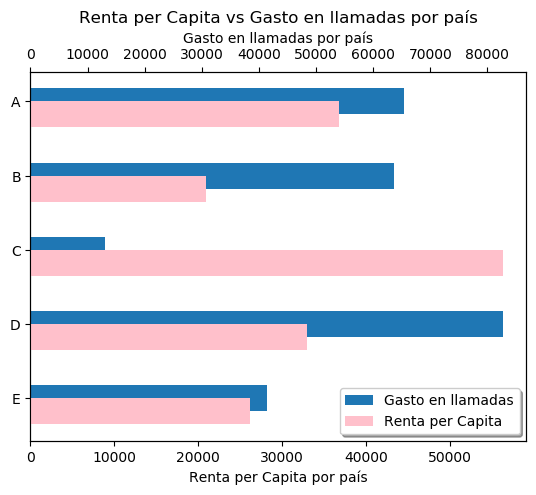

In [18]:
import matplotlib.pyplot as plt
import numpy as np

RPC = rentas_per_capita("renta_per_capita.txt")
total_ingresos_recibidas_pais = total_llamadas_pais(array_ingresos, 0)
total_ingresos_emitidas_pais = total_llamadas_pais(array_ingresos, 1)
total_ingresos_llamadas_pais = total_ingresos_recibidas_pais + total_ingresos_emitidas_pais

plt.rcdefaults()
fig, ax1 = plt.subplots()

paises = RPC[0] 
marcas_y = np.arange(len(paises)) 
ancho_barras = 0.35  

barras1 = ax1.barh(marcas_y, RPC[1], ancho_barras, label='RPC')
ax1.set_yticks(marcas_y)
ax1.set_yticklabels(paises)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('Renta per Capita por país')
ax1.set_title('Renta per Capita vs Gasto en llamadas por país')

ax2 = ax1.twiny()
ax2.set_xlabel('Gasto en llamadas por país')

barras2 = ax2.barh(marcas_y, total_ingresos_llamadas_pais, ancho_barras, label='Ingresos',align = "edge", color = "pink")

ax1.legend((barras1, barras2), ('Gasto en llamadas', 'Renta per Capita'), loc='best', shadow=True)

plt.show()

#### Ingresos a la compañía por países y desglose en ingresos por llamadas recibidas y enviadas

Se genera un gráfico de tarta para representar la proporción de ingresos generados para la compañía por las llamadas recibidas, emitidas y totales de cada país.

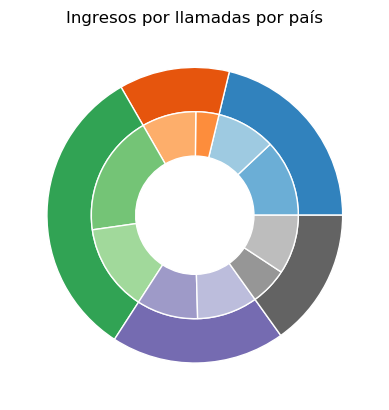

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

paises = RPC[0]
total_ingresos_recibidas_pais = list(total_llamadas_pais(array_ingresos, 0))
total_ingresos_emitidas_pais = list(total_llamadas_pais(array_ingresos, 1))

size = 0.3

a=[[tirp, tiep] for tirp in total_ingresos_recibidas_pais for tiep in total_ingresos_emitidas_pais if 
   total_ingresos_recibidas_pais.index(tirp) == total_ingresos_emitidas_pais.index(tiep)]
    

vals = np.array(a)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 13, 14, 17, 18]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Ingresos por llamadas por país')

plt.show()

#### Duración llamadas emitidas, recibidas y totales

Se genera un gráfico de dispersión en el que cada círculo representa un país, está centrado en las coordenadas de llamadas recibidas (eje x) y emitidas (eje y) y su tamaño representa el total de tiempo de llamadas emitidas y recibidas para cada país.

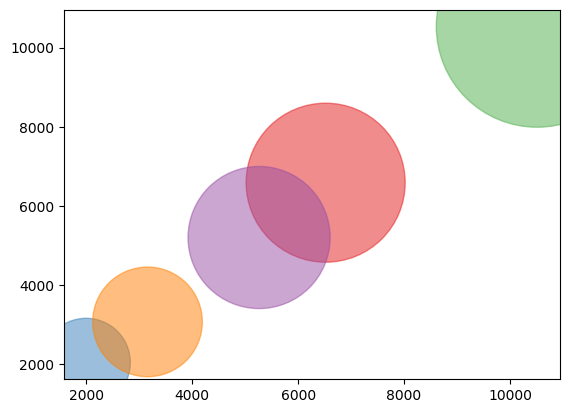

In [20]:
import matplotlib.pyplot as plt
import numpy as np

total_duracion_recibidas_pais = total_llamadas_pais(array_duracion, 0)
total_duracion_emitidas_pais = total_llamadas_pais(array_duracion, 1)

total_duracion_llamadas_pais = total_duracion_recibidas_pais + total_duracion_emitidas_pais

fig, ax = plt.subplots()

x = total_duracion_recibidas_pais
y = total_duracion_emitidas_pais
s = total_duracion_llamadas_pais

cmap = plt.get_cmap("Set1")
colors = cmap(np.arange(5))


scatter = ax.scatter(x, y, c=colors, s=s, alpha = 0.5)